In [2]:
import json
import geopandas as gpd
from shapely.geometry import Point
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import folium




In [3]:
# vytvoření mapy prahy
prague_map = folium.Map(location=[50.0755, 14.4378], zoom_start=11)
# prague_map 

In [4]:
prague_map

In [14]:
# nacteni geojson dat
with open('pro_baru_praha_gj.geojson') as f:
    data_zachody = json.load(f)

In [11]:
# přidání dat do mapy prahy
# Add GeoJSON points to the map

# folium.GeoJson(data_zachody).add_to(prague_map)

In [16]:
feature_group = folium.FeatureGroup('zachodky')

for feature in data_zachody['features']:
    if feature['geometry']['type'] == 'Point':
        folium.Marker(location=list(reversed(feature['geometry']['coordinates'])),
            icon=folium.Icon(color='blue', icon='toilet', prefix='fa'),
        ).add_to(feature_group)

feature_group.add_to(prague_map)

In [17]:
# zobrazeni mapy
prague_map

In [10]:
with open('pro_baru_praha.json', 'r') as file:
    wc_data = json.load(file)

In [11]:
print (wc_data)

[{'OBJECTID': 1, 'ADRESS': 'Libuňská 632/1', 'OPENING_TIME': 'po-ne 6:30-17:30', 'PRICE': 'jednotná cena 8 Kč (záloha 70Kč)', 'LONGITUDE': -728795.4067593776, 'LATITUDE': -1041664.118552342, 'LONGITUDE_GPS': 14.612813053328718, 'LATITUDE_GPS': 50.11649873205403, 'WD_OPENH': 'po-ne 6:30-17:30', 'WEKND_OPENH': 'po-ne 6:30-17:30'}, {'OBJECTID': 2, 'ADRESS': 'Nad stanicí 42', 'OPENING_TIME': 'po-pá 7:05-19:20; so-ne 8:05-16:50', 'PRICE': 'zdarma', 'LONGITUDE': -748010.1317960881, 'LATITUDE': -1041467.1654847674, 'LONGITUDE_GPS': 14.3463018053675, 'LATITUDE_GPS': 50.094834761321984, 'WD_OPENH': 'po-pá 7:05-19:20', 'WEKND_OPENH': ' so-ne 8:05-16:50'}, {'OBJECTID': 3, 'ADRESS': 'Türkova 2317/5, Praha 4', 'OPENING_TIME': 'po-ne 0:00-24:00', 'PRICE': 'zdarma', 'LONGITUDE': -738463.5803677216, 'LATITUDE': -1049300.9634951018, 'LONGITUDE_GPS': 14.493324156416186, 'LATITUDE_GPS': 50.03676044191174, 'WD_OPENH': 'po-ne 0:00-24:00', 'WEKND_OPENH': 'po-ne 0:00-24:00'}, {'OBJECTID': 4, 'ADRESS': 'Chodo

In [12]:
kriticka_vzdalenost_km = 1

# Identifikace kritických míst
kriticka_mista = []
for wc in wc_data:
    kriticka_mista_wc = [other_wc for other_wc in wc_data if 
                         (other_wc['LATITUDE_GPS'] != wc['LATITUDE_GPS'] or other_wc['LONGITUDE_GPS'] != wc['LONGITUDE_GPS']) and
                         geodesic((wc['LATITUDE_GPS'], wc['LONGITUDE_GPS']), (other_wc['LATITUDE_GPS'], other_wc['LONGITUDE_GPS'])).km <= kriticka_vzdalenost_km]
    if not kriticka_mista_wc:
        kriticka_mista.append(wc)

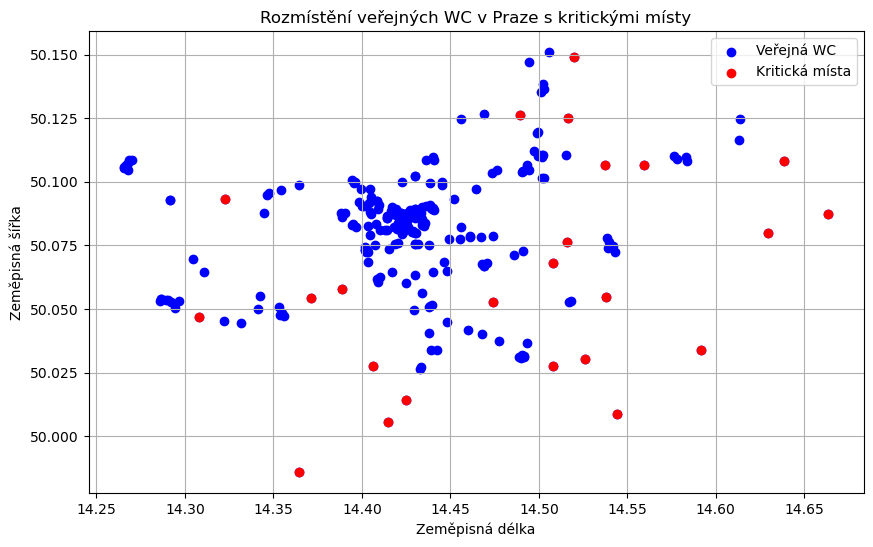

In [13]:
# Vizualizace výsledků na mapě
plt.figure(figsize=(10, 6))
plt.scatter([wc['LONGITUDE_GPS'] for wc in wc_data], [wc['LATITUDE_GPS'] for wc in wc_data], c='blue', label='Veřejná WC')
if kriticka_mista:
    plt.scatter([wc['LONGITUDE_GPS'] for wc in kriticka_mista], [wc['LATITUDE_GPS'] for wc in kriticka_mista], c='red', label='Kritická místa')

plt.xlabel('Zeměpisná délka')
plt.ylabel('Zeměpisná šířka')
plt.title('Rozmístění veřejných WC v Praze s kritickými místy')

plt.legend()
plt.grid(True)
plt.show()